### Build a Digit Recognition Program

we will design and implement a deep learning model that learns to recognize sequences of digits. We will train the model using synthetic data generated by concatenating character images from MNIST.

To produce a synthetic sequence of digits for testing, we will limit the to sequences to up to five digits, and use five classifiers on top of your deep network. We will incorporate an additional ‘blank’ character to account for shorter number sequences.

We will use Keras to implement the model. You can read more about Keras at keras.io.

In [1]:
#Module Imports
from __future__ import print_function
import random
from os import listdir
import glob

import numpy as np
from scipy import misc
import tensorflow as tf
import h5py

from keras.datasets import mnist
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Setting the random seed so that the results are reproducible. 
random.seed(101)

# Setting variables for MNIST image dimensions
mnist_image_height = 28
mnist_image_width = 28

In [3]:
# Import MNIST data from keras
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


Shape of training dataset: (60000, 28, 28)
Shape of test dataset: (10000, 28, 28)
Label for image: 5


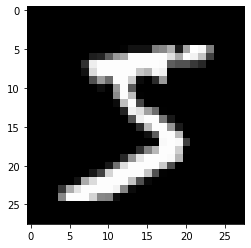

In [7]:
# Checking the downloaded data
print("Shape of training dataset: {}".format(np.shape(X_train)))
print("Shape of test dataset: {}".format(np.shape(X_test)))


plt.figure()
plt.imshow(X_train[0], cmap='gray')

print("Label for image: {}".format(y_train[0]))

#### Building Synthetic Data

The MNIST dataset is very popular for beginner Deep Learning projects. So, to add a twist to the tale, we're going to predict images that can contain 1 to 5 digits. We'll have to change the architecture of our deep learning model for this, but before that, we'll need to generate this dataset first.

To generate the synthetic training data, we will first start by randomly picking out up to 5 individual digits out from the MNIST training set. The individual images will be then stacked together, and blanks will be used to make up the number of digits if there were less than 5. By this approach, we could increase the size of our training data. We'll build around 60,000 such examples.

While concatenating images together, we'll also build the labels for each image. First, labels for single digits will be arranged in tuples of 5. Labels 0-9 will be used for digits 0-9, and a 10 will be used to indicate a blank.

The same approach will be used to build the test data, but using the MNIST test set for individual digits, for 10,000 synthetic test images.

Let's write a function that does this.

In [8]:
def build_synth_data(data,labels,dataset_size):
    
    # Define synthetic image dimensions
    synth_img_height = 64
    synth_img_width = 64
    
    # Define synthetic data
    synth_data = np.ndarray(shape=(dataset_size,synth_img_height,synth_img_width),
                           dtype=np.float32)
    
    # Define synthetic labels
    synth_labels = [] 
    
    # For a loop till the size of the synthetic dataset
    for i in range(0,dataset_size):
        
        # Pick a random number of digits to be in the dataset
        num_digits = random.randint(1,5)
        
        # Randomly sampling indices to extract digits + labels afterwards
        s_indices = [random.randint(0,len(data)-1) for p in range(0,num_digits)]
        
        # stitch images together
        new_image = np.hstack([X_train[index] for index in s_indices])
        # stitch the labels together
        new_label =  [y_train[index] for index in s_indices]
        
        
        #Loop till number of digits - 5, to concatenate blanks images, and blank labels together
        for j in range(0,5-num_digits):
            new_image = np.hstack([new_image,np.zeros(shape=(mnist_image_height,
                                                                   mnist_image_width))])
            new_label.append(10) #Might need to remove this step
        
        #Resize image
        new_image = misc.imresize(new_image,(64,64))
        
        #Assign the image to synth_data
        synth_data[i,:,:] = new_image
        
        #Assign the label to synth_data
        synth_labels.append(tuple(new_label))
        
    
    #Return the synthetic dataset
    return synth_data,synth_labels

In [10]:
# Building the training dataset
X_synth_train, y_synth_train = build_synth_data(X_train,y_train,60000)

AttributeError: module 'scipy.misc' has no attribute 'imresize'